# DH199 Report Three Preparation

## 1. Data Exploration

### 1.1 Data Cleaning

The data cleaning process: https://github.com/lizhouf/dh199_spring19/blob/data_cleaning/DH199_Treaty_Council_Corpus_Data_Cleaning.ipynb

The data to be used is now stored as "treaties_datetime_sentiments_cleaned.csv" in https://github.com/lizhouf/dh199_spring19/blob/data_cleaning/treaties_datetime_sentiments_cleaned.csv

### 1.2 Import packages and cleaned data

In [86]:
import pandas as pd
import numpy as np
df = pd.read_csv("treaties_datetime_sentiments_cleaned.csv")
df.head()

,Unnamed: 0,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,...,neu,compound,Negative,Positive,start_year,start_month,start_day,end_year,end_month,end_day
0,0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,...,0.809,0.9989,False,True,1768,10,24,1768,11,5
1,1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Abraham,Chief,Native,...,0.820,0.9706,False,True,1768,10,24,1768,11,5
2,2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,...,0.894,0.2960,False,True,1768,10,24,1768,11,5
3,3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speaker,NaN,Native,...,0.882,-0.3327,True,False,1768,10,24,1768,11,5
4,4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speaker,NaN,Native,...,0.817,0.8460,False,True,1768,10,24,1768,11,5


### 1.2 Select Nations of Interest

In [87]:
### Count number of records by nation
# make a list of all the (unique) native nations
nations = list(df[df["Native | Non-Native"]=="Native"]["Tribe or Ethnicity"].unique())

In [88]:
# Get rid of nan and the group of nations
nations.pop(2)
nations.pop(12)
nations

['Oneida',
 'Mohawk',
 'Aghquessaine',
 'Chauvrons',
 'Wea',
 'Miamis',
 'Potawatomi',
 'Ottawas',
 'Chippewa',
 'Seneca',
 'Scioto',
 'Delawares',
 'Shawanese',
 'Mingo',
 'Wyandott',
 'Kickapoo',
 'Mohegan',
 'Sawkies',
 'Piankeshaw',
 'Chickasaws']

In [89]:
### count the number of records for each item in the nation's list
# Visualize the count
nations_count = pd.DataFrame()
nations_count["nation"] = nations
counts = []
for i in nations:
    counts.append(len(df[df["Tribe or Ethnicity"]==i]))
nations_count["count"] = counts
nations_count.sort_values(by = ["count"],ascending = False, inplace=True)
nations_count

,nation,count
11,Delawares,8
4,Wea,6
5,Miamis,6
6,Potawatomi,6
0,Oneida,5
9,Seneca,5
12,Shawanese,5
7,Ottawas,3
1,Mohawk,3
15,Kickapoo,2


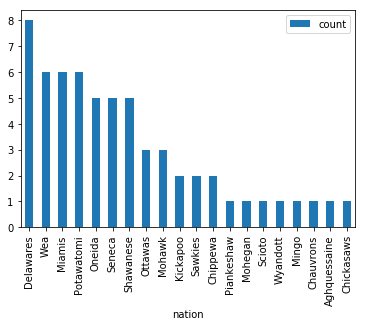

In [90]:
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
nations_count.plot(kind="bar", x="nation")

In [91]:
# we are interested in the data for nations with >4 records
nations_selected = []
for i in nations:
    if len(df[df["Tribe or Ethnicity"]==i])>4:
        nations_selected.append(i)

# select the data for the nations of interest
# reference: df operations: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#iloc-selection
df_natives = df[df["Tribe or Ethnicity"].isin(nations_selected)].iloc[:,1:].reset_index(drop=True)
df_natives

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,neu,compound,Negative,Positive,start_year,start_month,start_day,end_year,end_month,end_day
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0.809,0.9989,False,True,1768,10,24,1768,11,5
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0.894,0.2960,False,True,1768,10,24,1768,11,5
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,0.806,0.9820,False,True,1768,10,24,1768,11,5
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,0.881,0.9343,False,True,1768,10,24,1768,11,5
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0.901,0.9779,False,True,1768,10,24,1768,11,5
5,1781-02-25.txt,Treaty of 1781-02-25,1781-02-25,1781-02-25,Miamis,NaN,NaN,NaN,Native,Wea,...,0.803,0.9816,False,True,1781,2,25,1781,2,25
6,1781-03-09.txt,Treaty of 1781-03-09,1781-03-09,1781-03-09,NaN,NaN,NaN,Miamis Chief,Native,Miamis,...,0.740,0.9939,False,True,1781,3,9,1781,3,9
7,1781-03-11.txt,Treaty of 1781-03-11,1781-03-11,1781-03-11,Detroit,Michigan,Assimut,Chief of the Potawatomi,Native,Potawatomi,...,0.825,-0.9418,True,False,1781,3,11,1781,3,11
8,1781-03-11.txt,Treaty of 1781-03-11,1781-03-11,1781-03-11,Detroit,Michigan,Wawiaghtenou,Chief of the Potawatomi,Native,Potawatomi,...,0.679,-0.3369,True,False,1781,3,11,1781,3,11
9,1781-10-29.txt,Treaty of 1781-10-29,1781-10-29,1781-10-29,Detroit,Michigan,Miami Chief,Chief of the Potawatomi,Native,Miamis,...,0.868,-0.8972,True,False,1781,10,29,1781,10,29


In [92]:
df_natives.columns

Index(['Document', 'Treaty Name', 'Council Start Date', 'Council End Date',
       'Council City', 'Council State', 'Speaker', 'Position',
       'Native | Non-Native', 'Tribe or Ethnicity', 'Text', 'neg', 'pos',
       'neu', 'compound', 'Negative', 'Positive', 'start_year', 'start_month',
       'start_day', 'end_year', 'end_month', 'end_day'],
      dtype='object')

## 2. Data Pre-processing

### 2.1 Tokenize Words and Sentences

In [93]:
from nltk.tokenize import sent_tokenize, word_tokenize
df_natives["word_tokens"] = df_natives.Text.apply(lambda x: word_tokenize(x))
df_natives["sent_tokens"] = df_natives.Text.apply(lambda x: sent_tokenize(x))
df_natives.head()

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,Negative,Positive,start_year,start_month,start_day,end_year,end_month,end_day,word_tokens,sent_tokens
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, a, Congress, with, the, several, Nations,...",[At a Congress with the several Nations on Tue...
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[Then, Canaghquieson, addressed, the, whole, a...",[Then Canaghquieson addressed the whole and de...
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, night, Tagawaron, returned, with, the, Ma...",[At night Tagawaron returned with the Map to S...
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, 10, A, M., The, Oneidas, returned, to, Si...",[At 10 A M. The Oneidas returned to Sir Willia...
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, night, Canaquieson, came, to, inform, Sir...",[At night Canaquieson came to inform Sir Willi...


### 2.2 Remove Stopwords

In [94]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# we only remove the stopwords for the tokenized words
# to keep the syntaxes of the texts original

def filter_stopwords(words, stopWords):
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    return wordsFiltered

df_natives.word_tokens = df_natives.word_tokens.apply(lambda x: filter_stopwords(x, stop_words))

### 2.3 Stemmatizing

In [95]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [96]:
def stem_words(words):
    wordsStemmed = []
    for w in words:
        wordsStemmed.append(ps.stem(w))
    return wordsStemmed

df_natives.word_tokens = df_natives.word_tokens.apply(lambda x: stem_words(x))

### 2.4 Identify Symbols

We can identify the general symbols for each of the text above, from the list https://www.warpaths2peacepipes.com/native-american-symbols/list-of-symbols.htm; we stored the possible symbols in a csv file.

In [97]:
# make a list of all the words that might be used by the nations
df_symbols = pd.read_csv("symbols.csv")
df_symbols.head()

,Names of Symbols,Meanings of Symbols
0,Arrow,Meaning of Arrow symbol
1,Arrowhead,Meaning of Arrowhead symbol
2,Avanyu,Meaning of Avanyu symbol
3,Bear,Meaning of Bear symbol
4,Bear Track,Meaning of Bear Track symbol


In [98]:
print("There are", df_symbols.shape[0], "possible symbols.")

There are 109 possible symbols.


In [99]:
symbols = list(df_symbols["Names of Symbols"])
len(symbols)

109

In [100]:
# stem the symbols and make them unique
symbol_stems = list(set(stem_words(symbols)))
symbol_stems

['mother',
 'scalp',
 'eagl',
 'zuni bear',
 'crow',
 'heartlin',
 'life',
 'twin',
 'protect',
 'saddlebag',
 'swastika',
 'hors',
 'gila monst',
 'hope',
 'bird man',
 'chang',
 'serpent',
 'panther',
 'medicine wheel',
 'kokopelli',
 'arrowhead',
 'deer track',
 'coyot',
 'lightn',
 'bird symbol',
 'wolf track',
 'man',
 'hand',
 'avanyu',
 'war',
 'owl',
 'days and night',
 'drum',
 'feathered serp',
 'cross',
 'fox',
 'great spirit',
 'temporary hom',
 'hoof print',
 'sister',
 'horned serp',
 'love',
 'bear track',
 'raccoon',
 'man in the maz',
 'rain',
 'camp fir',
 'lake',
 'morning star',
 'falcon',
 'cross in a circl',
 'famili',
 'thunderbird',
 'arrow',
 'handprint',
 'peac',
 'yei',
 'mountain rang',
 'chunkey',
 'journey',
 'cactu',
 'feather',
 'water',
 'enclosur',
 'solar cross',
 'spring & summ',
 'squar',
 'brother',
 'warrior',
 'hand ey',
 'dragonfli',
 'sun symbol',
 'great serp',
 'dancer',
 'wolf',
 'red horn',
 'bird track',
 'homecom',
 'circl',
 'bear',
 'hu

## 3. Text Analysis around Specific Research Questions

### 3.1 What symbols are being used?

In [101]:
# add all the symbols as columns in the df
print("Shape of df_natives before adding is", list(df_natives.shape))
for w in symbol_stems:
    df_natives[w] = [0]*len(df_natives)
print("Shape of df_natives after adding is", list(df_natives.shape))

Shape of df_natives before adding is [41, 25]
Shape of df_natives after adding is [41, 134]


In [102]:
df_natives

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,white soldi,indian camp,hawk,shaman,snake,turtl,earth,harmoni,symbol of strength,butterfli
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
5,1781-02-25.txt,Treaty of 1781-02-25,1781-02-25,1781-02-25,Miamis,NaN,NaN,NaN,Native,Wea,...,0,0,0,0,0,0,0,0,0,0
6,1781-03-09.txt,Treaty of 1781-03-09,1781-03-09,1781-03-09,NaN,NaN,NaN,Miamis Chief,Native,Miamis,...,0,0,0,0,0,0,0,0,0,0
7,1781-03-11.txt,Treaty of 1781-03-11,1781-03-11,1781-03-11,Detroit,Michigan,Assimut,Chief of the Potawatomi,Native,Potawatomi,...,0,0,0,0,0,0,0,0,0,0
8,1781-03-11.txt,Treaty of 1781-03-11,1781-03-11,1781-03-11,Detroit,Michigan,Wawiaghtenou,Chief of the Potawatomi,Native,Potawatomi,...,0,0,0,0,0,0,0,0,0,0
9,1781-10-29.txt,Treaty of 1781-10-29,1781-10-29,1781-10-29,Detroit,Michigan,Miami Chief,Chief of the Potawatomi,Native,Miamis,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# df_natives.to_csv('df_natives.csv')

In [112]:
for i in range(len(df_natives)):
    for j in range(len(df_natives.columns)):
        if j>24:
            df_natives.iloc[i,j]=df_natives["word_tokens"][i].count(symbol_stems[j-25])

In [113]:
df_natives

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,white soldi,indian camp,hawk,shaman,snake,turtl,earth,harmoni,symbol of strength,butterfli
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
5,1781-02-25.txt,Treaty of 1781-02-25,1781-02-25,1781-02-25,Miamis,NaN,NaN,NaN,Native,Wea,...,0,0,0,0,0,0,1,0,0,0
6,1781-03-09.txt,Treaty of 1781-03-09,1781-03-09,1781-03-09,NaN,NaN,NaN,Miamis Chief,Native,Miamis,...,0,0,0,0,0,0,0,0,0,0
7,1781-03-11.txt,Treaty of 1781-03-11,1781-03-11,1781-03-11,Detroit,Michigan,Assimut,Chief of the Potawatomi,Native,Potawatomi,...,0,0,0,0,0,0,0,0,0,0
8,1781-03-11.txt,Treaty of 1781-03-11,1781-03-11,1781-03-11,Detroit,Michigan,Wawiaghtenou,Chief of the Potawatomi,Native,Potawatomi,...,0,0,0,0,0,0,0,0,0,0
9,1781-10-29.txt,Treaty of 1781-10-29,1781-10-29,1781-10-29,Detroit,Michigan,Miami Chief,Chief of the Potawatomi,Native,Miamis,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# df_natives.to_csv('df_natives2.csv')
# after see the significant results, like brother, we conclude that this action is possible
# this takes me 5 hours to debug
# and finally end up with a single solution

In [137]:
print("There are", sum(df_natives[symbol_stems].sum()>0), "symbols occuring.")

There are 24 symbols occuring.


In [163]:
# select the columns needed from the symbol_stems
symbols_natives = df_natives[symbol_stems]

In [165]:
# drop the not used symbols
for col in symbols_natives:
    if not symbols_natives[col].sum():
        symbols_natives.drop(col, axis=1, inplace=True)

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [169]:
# select the columns needed from the original df_natives
col_needed = ["Tribe or Ethnicity", "word_tokens", "pos", "neg"]
short_natives = df_natives[col_needed]
short_natives

,Tribe or Ethnicity,word_tokens,pos,neg
0,Oneida,"[At, congress, sever, nation, tuesday, 25th, o...",0.155,0.036
1,Oneida,"[then, canaghquieson, address, whole, desir, s...",0.106,0.000
2,Oneida,"[At, night, tagawaron, return, map, sir, willi...",0.162,0.032
3,Oneida,"[At, 10, A, M., the, oneida, return, sir, will...",0.091,0.028
4,Oneida,"[At, night, canaquieson, came, inform, sir, wi...",0.094,0.005
5,Wea,"[We, flatter, (, lacan, ), alway, french, hear...",0.141,0.056
6,Miamis,"[chief, ., By, four, string, wampum, black, ,,...",0.203,0.057
7,Potawatomi,"[father, ,, I, hire, potawatomi, near, st., jo...",0.041,0.134
8,Potawatomi,"[father, ,, I, rise, speak, behalf, potawatomi...",0.149,0.172
9,Miamis,"[father, !, I, sent, chief, hast, powder, &, b...",0.031,0.101


In [172]:
# combine the two dfs
data = pd.concat([short_natives, symbols_natives], axis=1, join_axes=[short_natives.index])
data

,Tribe or Ethnicity,word_tokens,pos,neg,scalp,eagl,life,protect,hors,hope,...,water,brother,warrior,fire,death,moon,friendship,strength,winter,earth
0,Oneida,"[At, congress, sever, nation, tuesday, 25th, o...",0.155,0.036,0,0,0,0,0,2,...,1,12,0,2,1,0,0,1,0,0
1,Oneida,"[then, canaghquieson, address, whole, desir, s...",0.106,0.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Oneida,"[At, night, tagawaron, return, map, sir, willi...",0.162,0.032,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Oneida,"[At, 10, A, M., the, oneida, return, sir, will...",0.091,0.028,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Oneida,"[At, night, canaquieson, came, inform, sir, wi...",0.094,0.005,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,Wea,"[We, flatter, (, lacan, ), alway, french, hear...",0.141,0.056,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,Miamis,"[chief, ., By, four, string, wampum, black, ,,...",0.203,0.057,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
7,Potawatomi,"[father, ,, I, hire, potawatomi, near, st., jo...",0.041,0.134,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,Potawatomi,"[father, ,, I, rise, speak, behalf, potawatomi...",0.149,0.172,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Miamis,"[father, !, I, sent, chief, hast, powder, &, b...",0.031,0.101,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.2  Which of the symbols are used frequently?

In [208]:
symbols_count = symbols_natives.append(symbols_natives.agg(['sum']))
symbols_count.sum().sort_values(ascending=False)

brother       218
warrior        66
peac           64
hand           54
hope           46
war            36
friendship     36
fire           34
man            16
lake           16
life           10
death          10
famili          8
journey         8
protect         6
scalp           6
strength        6
winter          4
water           4
hors            4
earth           4
sister          2
moon            2
eagl            2
dtype: int64

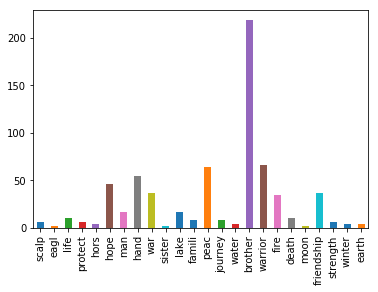

In [197]:
symbols_count.sum().plot(kind='bar')

### 3.3 Which tribes use what symbols most?

In [211]:
data1 = data.drop(["word_tokens", "neg", "pos"], axis=1)

In [214]:
symbol_by_group = data1.groupby("Tribe or Ethnicity").sum()
symbol_by_group

,scalp,eagl,life,protect,hors,hope,man,hand,war,sister,...,water,brother,warrior,fire,death,moon,friendship,strength,winter,earth
Tribe or Ethnicity,,,,,,,,,,,,,,,,,,,,,
Delawares,0,0,1,1,0,3,3,2,5,0,...,0,20,3,0,0,0,7,0,0,0
Miamis,1,0,1,0,0,1,0,5,5,0,...,0,5,5,0,1,0,1,0,0,0
Oneida,0,1,0,0,1,3,0,4,0,0,...,1,12,1,2,1,0,0,1,0,0
Potawatomi,0,0,2,1,0,6,2,4,2,1,...,0,0,7,2,0,1,0,0,2,0
Seneca,1,0,0,0,0,4,1,5,0,0,...,1,38,11,5,0,0,6,1,0,0
Shawanese,1,0,0,1,1,3,2,6,1,0,...,0,32,6,8,3,0,4,1,0,1
Wea,0,0,1,0,0,3,0,1,5,0,...,0,2,0,0,0,0,0,0,0,1


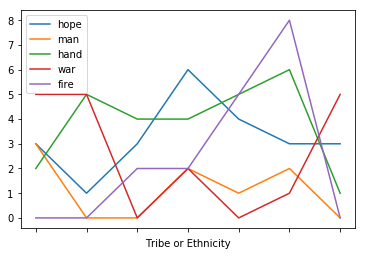

In [232]:
symbol_by_group[["hope","man","hand","war","fire"]].plot(kind="line")

From left to right: Delawares, Miamis, Oneida, Potawatomi, Seneca, Shawanese, Wea.

### 3.4 How are figurative languages used to express sentiments? Which symbols are associated with positive/negative sentiments?

*We choose fire for this discussion.* Reference: Stark, Heidi Kiiwetinepinesiik. “Marked by Fire: Anishinaabe Articulations of Nationhood in Treaty Making with the United States and Canada.” American Indian Quarterly 36, no. 2 (2012): 119–49. https://doi.org/10.5250/amerindiquar.36.2.0119.

In [239]:
data

,Tribe or Ethnicity,word_tokens,pos,neg,scalp,eagl,life,protect,hors,hope,...,water,brother,warrior,fire,death,moon,friendship,strength,winter,earth
0,Oneida,"[At, congress, sever, nation, tuesday, 25th, o...",0.155,0.036,0,0,0,0,0,2,...,1,12,0,2,1,0,0,1,0,0
1,Oneida,"[then, canaghquieson, address, whole, desir, s...",0.106,0.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Oneida,"[At, night, tagawaron, return, map, sir, willi...",0.162,0.032,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Oneida,"[At, 10, A, M., the, oneida, return, sir, will...",0.091,0.028,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Oneida,"[At, night, canaquieson, came, inform, sir, wi...",0.094,0.005,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,Wea,"[We, flatter, (, lacan, ), alway, french, hear...",0.141,0.056,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,Miamis,"[chief, ., By, four, string, wampum, black, ,,...",0.203,0.057,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
7,Potawatomi,"[father, ,, I, hire, potawatomi, near, st., jo...",0.041,0.134,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,Potawatomi,"[father, ,, I, rise, speak, behalf, potawatomi...",0.149,0.172,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Miamis,"[father, !, I, sent, chief, hast, powder, &, b...",0.031,0.101,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
# focus on per-speaker-per-statement level
# (rather than sentence/semantic group level, for now)
fire_positive = 0
for i in range(len(data)):
    fire_positive=fire_positive+(data["pos"][i]*data["fire"][i])
fire_negative = 0
for i in range(len(data)):
    fire_negative=fire_negative+(data["neg"][i]*data["fire"][i])
fire_positive_proportion = fire_positive/(fire_positive+fire_negative)
fire_nefative_proportion = fire_negative/(fire_positive+fire_negative)
print("The word fire is associated with", fire_positive_proportion, "proportion positive statements, and", fire_nefative_proportion , "proportion negative statements")

The word fire is associated with 0.753800217155266 proportion positive statements, and 0.24619978284473396 proportion negative statements


## 4. Conclusions

See the google doc for conclusions' write-up.

## 5. Limitations and Discussions

- Stopwords might need to be specified, according to the special time period of the research;
- More data need to be collected (may use the additional data Prof. Garcia provided);
- Stemmatizing is always mixing seemingly similar but actually different words together, like the word "peace" is now as "peac" in the plot.
- If time permitted, we can look into "Kinship Metaphors for Nationhood", as planned.